### Codio Activity 9.1: Sequential Feature Selection 

**Expected Time: 60 minutes**

**Total Points: 70**

This activity focuses on using the stepwise feature selection approach outlined in video 9.3.  Here, your goal is to first generate polynomial features for a `degree = 3` model and limit them to a set number using the `SequentialFeatureSelection`. For more information on the selector see [here](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection). 

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data

The [Medical Cost Personal dataset](https://www.kaggle.com/mirichoi0218/insurance) used in this assignment is from kaggle  and contains information on insurance clients and their medical costs billed by the insurance company.  You will build regression models to predict the logarithm of the `charges` column. The dataset is loaded and displayed below, and the original target is plotted next to its resulting logarithm.   

In [13]:
insurance = pd.read_csv('data/insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/insurance.csv'

In [14]:
insurance.head()

NameError: name 'insurance' is not defined

In [15]:
insurance.info()

NameError: name 'insurance' is not defined

NameError: name 'insurance' is not defined

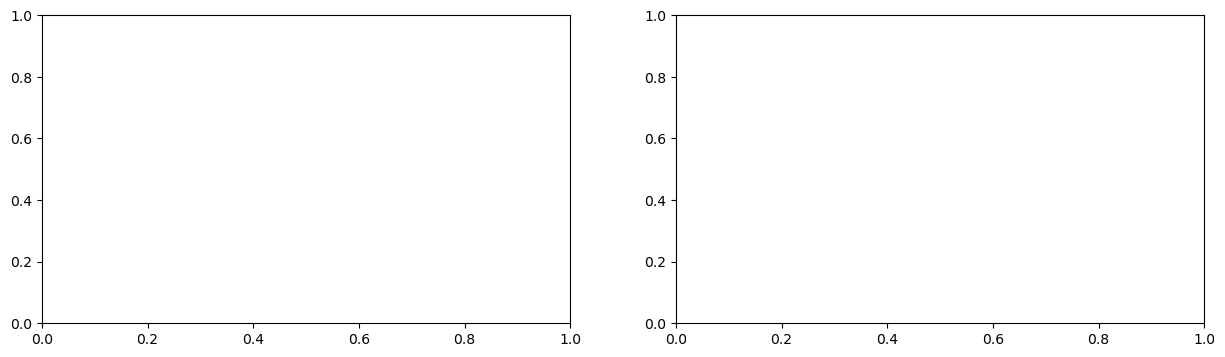

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(insurance['charges'])
ax[0].grid()
ax[0].set_title('Original charges column')
ax[1].hist(np.log1p(insurance['charges']))
ax[1].grid()
ax[1].set_title('Logarithm of charges');

[Back to top](#Index)

### Problem 1

#### Train/Test split

**Points: 10**

Create a train and test set using `train_test_split` and assign to `X_train`, `X_test`, `y_train`, `y_test` below with parameters:

- `test_size = 0.3`
- `random_state = 42`

For the feaures, use all the column inside the `insurance` DataFrame except for the `charges` one. The target data (`insurance.charges`) should be transformed using to the `np.log1p` function.  

In [17]:
### GRADED
X = insurance.drop('charges', axis=1)
y = np.log1p(insurance['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Answer check
print(X_train.shape)
print(X_test.shape)

NameError: name 'insurance' is not defined

[Back to top](#Index)

### Problem 2

#### Building `PolynomialFeatures`

**Points: 10**

To begin, create a `DataFrame` with the `degree = 3` features and interaction terms added for numeric columns. Assign the following objects to the variables:

- Instantiate a `PolynomialFeatures` object for cubic features. Inside this function, set `include_bias=False`. Assign this result to `poly_features`.
- Use the `fit_transform` function on `poly_features` to fit and transformed the features using `['age', 'bmi', 'children']`.  Assign this result to `X_train_poly`.
- Use the `transform` function on `poly_features` to fit and transformed the test data using `['age', 'bmi', 'children']`.  Assign this result to `X_test_poly`.
- Use the `get_feature_names_out` function on `poly_features` to extract the column names. Assign this result to `columns`.
- Create a  DataFrame with the `X_train_poly` data and column names equal to `column`. Assign this result to `train_df`.
- Create a  DataFrame with the `X_test_poly` data and column names equal to `column`. Assign this result to `test_df`.

The DataFrame `train_df` should look like:

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>age</th>      <th>bmi</th>      <th>children</th>      <th>age^2</th>      <th>age bmi</th>      <th>age children</th>      <th>bmi^2</th>      <th>bmi children</th>      <th>children^2</th>      <th>age^3</th>      <th>age^2 bmi</th>      <th>age^2 children</th>      <th>age bmi^2</th>      <th>age bmi children</th>      <th>age children^2</th>      <th>bmi^3</th>      <th>bmi^2 children</th>      <th>bmi children^2</th>      <th>children^3</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>61.0</td>      <td>31.160</td>      <td>0.0</td>      <td>3721.0</td>      <td>1900.760</td>      <td>0.0</td>      <td>970.945600</td>      <td>0.00</td>      <td>0.0</td>      <td>226981.0</td>      <td>115946.360</td>      <td>0.0</td>      <td>59227.681600</td>      <td>0.0</td>      <td>0.0</td>      <td>30254.664896</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>1</th>      <td>46.0</td>      <td>27.600</td>      <td>0.0</td>      <td>2116.0</td>      <td>1269.600</td>      <td>0.0</td>      <td>761.760000</td>      <td>0.00</td>      <td>0.0</td>      <td>97336.0</td>      <td>58401.600</td>      <td>0.0</td>      <td>35040.960000</td>      <td>0.0</td>      <td>0.0</td>      <td>21024.576000</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>2</th>      <td>54.0</td>      <td>31.900</td>      <td>3.0</td>      <td>2916.0</td>      <td>1722.600</td>      <td>162.0</td>      <td>1017.610000</td>      <td>95.70</td>      <td>9.0</td>      <td>157464.0</td>      <td>93020.400</td>      <td>8748.0</td>      <td>54950.940000</td>      <td>5167.8</td>      <td>486.0</td>      <td>32461.759000</td>      <td>3052.8300</td>      <td>287.10</td>      <td>27.0</td>    </tr>    <tr>      <th>3</th>      <td>55.0</td>      <td>30.685</td>      <td>0.0</td>      <td>3025.0</td>      <td>1687.675</td>      <td>0.0</td>      <td>941.569225</td>      <td>0.00</td>      <td>0.0</td>      <td>166375.0</td>      <td>92822.125</td>      <td>0.0</td>      <td>51786.307375</td>      <td>0.0</td>      <td>0.0</td>      <td>28892.051669</td>      <td>0.0000</td>      <td>0.00</td>      <td>0.0</td>    </tr>    <tr>      <th>4</th>      <td>25.0</td>      <td>45.540</td>      <td>2.0</td>      <td>625.0</td>      <td>1138.500</td>      <td>50.0</td>      <td>2073.891600</td>      <td>91.08</td>      <td>4.0</td>      <td>15625.0</td>      <td>28462.500</td>      <td>1250.0</td>      <td>51847.290000</td>      <td>2277.0</td>      <td>100.0</td>      <td>94445.023464</td>      <td>4147.7832</td>      <td>182.16</td>      <td>8.0</td>    </tr>  </tbody></table>'

In [18]:
### GRADED
features = ['age', 'bmi', 'children']
def create_test_and_train_dataframes(degree, features, X_train, X_test):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train[features])
    X_test_poly = poly_features.transform(X_test[features])
    columns = poly_features.get_feature_names_out(features)
    train_df = pd.DataFrame(X_train_poly, columns=columns)
    test_df = pd.DataFrame(X_test_poly, columns=columns)
    return train_df, test_df

train_df, test_df = create_test_and_train_dataframes(3, features, X_train, X_test)

test_df.to_csv('data/test_cubic.csv', index = False)
train_df.to_csv('data/train_cubic.csv', index = False)
# ANSWER CHECK
train_df.head()

NameError: name 'X_train' is not defined

In [19]:
test_df

NameError: name 'test_df' is not defined

[Back to top](#Index)

### Problem 3

#### Using `SequentialFeatureSelector`

**Points: 10**

Use the `SequentialFeatureSelector` function with a `LinearRegression` estimator to select three features (`n_features_to_select = 3`). Assign this result to `selector`.

Use the `fit_transform` function on `selector` to train the model on `train_df` and `y_train`. Assign this result to `best_features`.

Finally, assign your transformed features `best_features` to a DataFrame. The columns of this DataFrame will be equal to `selector.get_feature_names_out()`.  Assigned the result to `best_features_df` as an array.

In [20]:
### GRADED

selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select = 3)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())

# ANSWER CHECK
best_features_df.head()

NameError: name 'train_df' is not defined

[Back to top](#Index)

### Problem 4

#### `Pipeline` for regression model

**Points: 20**

Complete the code below according to the instructions below:

- Create a `Pipeline` object with steps `column_selector` to select three features, and `linreg` to build a `LinearRegression` estimator. Assign this resul to `pipe`.
- Use the `fit` function to train your pipeline using `train_df` and `y_train`.
- Use the `predict` function to calculate the predicitons on `train_df`. Assign the result on `train_preds`.
- Use the `predict` function to calculate the predicitons on `test_df`. Assign the result on `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y_train` and `train_preds`. Assign your result to `train_mse`.
- Use the `mean_squared_error` function to calculate the MSE between `y_test` and `test_preds`. Assign your result to `test_mse`.


In [8]:
### GRADED

pipe = Pipeline([
    ('column_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select = 3)),
    ('linreg', LinearRegression())
])
pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

NameError: name 'train_df' is not defined

[Back to top](#Index)

#### Problem 5

#### Backward Selction

**Points: 20**

Similar to the forward selection method, backward selection starts with all features and sequentially eliminates features until the threshold is achieved. 

Repeat the steps on Problem 4, but now use the selector `backward_selector` below to again build a pipeline named `backward_pipe` and fit a `LinearRegression` model using three features from `train_df`. 

Assign the train and test mean squared errors as `backward_train_mse` and `backward_test_mse` respectively.

In [9]:
backward_selector = SequentialFeatureSelector(LinearRegression(), 
                                              n_features_to_select=3,
                                              direction = 'backward')

In [10]:
### GRADED
# Fit the selector on the training data
backward_selector.fit(train_df, y_train)

# Create the pipeline with the backward selector and linear regression
backward_pipe = Pipeline([
    ('backward_selector', backward_selector),
    ('linreg', LinearRegression())
])

# Fit the pipeline to the training data
backward_pipe.fit(train_df, y_train)

# Make predictions using the pipeline
train_pred_bw = backward_pipe.predict(train_df)
test_pred_bw = backward_pipe.predict(test_df)

# Calculate the mean squared errors
backward_train_mse = mean_squared_error(y_train, train_pred_bw)
backward_test_mse = mean_squared_error(y_test, test_pred_bw)

# Answer check
print(f'Train MSE: {backward_train_mse:.2f}')
print(f'Test MSE: {backward_test_mse:.2f}')

NameError: name 'train_df' is not defined

#### Further Exploration

As an optional exercise work on incorporating the `PolynomialFeatures` into the pipeline along with a `TransformedTargetRegressor` to further abstract the modeling process.  

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

# Create a pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('regressor', TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log,           # transform target using log
        inverse_func=np.exp    # transform predictions back using exp
    ))
])

# Fit the model
model.fit(X_train[features], y_train)

NameError: name 'X_train' is not defined